# [SWCON25301] Machine Learning
Teaching Assistant: Suyong Bahk (clapd10@khu.ac.kr), 

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1:  Linear/Polynomial Regression Model (10점)

### 학습목표
- 실습에 필요한 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해한다.
- Python, NumPy로 작성된 Linear Regression Model을 분석하고 이해한다.
- Python, NumPy로 Polynomial Regression Model class를 직접 작성하고 분석한다.

### 실습내용

실습은 다음 순서로 진행됩니다.
학생분들께서는 **<구현>** 과 **<작성>** 에 해당하는 부분을 수행해주시면 됩니다.

- S1. Linear Regression Model 구현 및 분석
    - 1) 패키지 import
    - 2) 데이터셋 생성
    - 3) Linear Regression Model 구현
    - 4) 학습 및 결과 시각화

<br>

- S2. Polynomial Regression Model 구현 및 분석
    - 1) Polynomial Regression Model 구현 **<구현>** 
    - 2) 학습 및 결과 시각화
    - 3) Polynomial Regression Model 분석 **<구현>** 

<br>

- S3. Discussion **<작성>**


--- 

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록 합니다.


### 점수
- 2-1) Polynomial regression model class 구현: **4점**
- 2-3) Polynomial Regression Model 분석: **4점**
- Discussion: **2점**  
**- 단, 2-1) 하단의 답안 미 작성 시 과제 점수 감점이 있으므로 꼭 작성 후 제출하세요.** 

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> Download/export as -> HTML)도 함께 제출하세요. 하나만 제출할시 2점 감점이 있습니다.

---

## S1. Linear regression model 분석

S1에서는 2차원 평면 상의 데이터에 대하여 해당 데이터를 잘 표현할 수 있는 선형 회귀 모델(Linear Regression Model)을 학습하고 평가합니다.

### 1-1) Import packages
**수정하지 마세요.**

In [1]:
from random import random as rand
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1-2) Loading the Dataset
**수정하지 마세요.** 

학습과 테스트에 사용할 데이터를 생성합니다.

In [2]:
# Random seed
random.seed(1234)

# Generate 2-dimensional data points
X = [rand() * i * 0.5 - 20 for i in range(0, 100)]
y = [x**3 * 0.002 - x**2 * 0.005 + x * 0.003 + rand() * 5 for x in X]
print(len(X), len(y))

100 100


Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
# Data random shuffle
idx = list(range(len(X)))
random.shuffle(idx)

# Split data for train/test
X_train, X_test = [X[i] for i in idx[:80]], [X[i] for i in idx[80:]]
y_train, y_test = [y[i] for i in idx[:80]], [y[i] for i in idx[80:]]

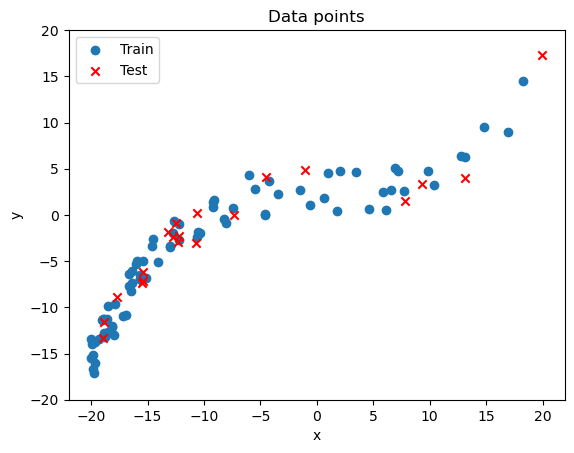

In [4]:
# 학습 데이터를 시각화하여 분포를 확인
plt.scatter(
    [i for idx, i in enumerate(X_train)],
    [i for idx, i in enumerate(y_train)],
    label="Train",
    marker="o",
)

plt.scatter(
    [i for idx, i in enumerate(X_test)],
    [i for idx, i in enumerate(y_test)],
    label="Test",
    marker="x",
    color="r",
)

plt.title("Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-20, 20])
plt.legend()
plt.show()

### 1-3) Linear Regression Model 구현

**수정하지 마세요.** 

`Linear` class는 다음 함수들로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 weights와 bias를 초기화합니다.
- `calc_loss_and_gradient`는 input과 output 사이의 MSE loss와 그 gradient를 계산합니다.
- `shuffle_datasets`는 데이터셋을 섞는 역할을 합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `update_parameters`에서는 계산된 MSE loss와 그 gradient를 입력으로 받아 모델의 가중치를 업데이트 합니다.  
(Tip : update_parameters는 딥러닝 라이브러리에서 backward pass로도 불립니다.)
- `fit`에서는 model을 학습하는 과정으로 `forward`와 `update_parameters`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `predict`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.


In [5]:
class Linear:
    def __init__(self, batch_size, lr=1e-5):
        # initialization with a numpy array type
        self.weight = np.array(rand())
        self.bias = 0  # initialization
        self.lr = lr  # learning rate
        self.batch_size = batch_size

    def shuffle_datasets(self, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]

    def fit(self, x, y, epochs):
        x_arr = np.array(x)
        y_arr = np.array(y)
        for e in range(epochs):  # epochs 만큼 학습
            # shuffle dataset
            x, y = self.shuffle_datasets(x_arr, y_arr)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size
            remain = (
                len(x) % self.batch_size
            )  # batch size 크기의 배수가 아닌 나머지 training example 개수
            x = x[remain:]  # remain을 제외한 training example만 사용
            y = y[remain:]
            x = np.array_split(x, num_batches)  # 배치 크기씩 데이터 분할
            y = np.array_split(y, num_batches)

            # 각 배치마다 파라미터 업데이트
            for batch_x_y in zip(x, y):  # 배치 하나씩 학습
                batch_x, batch_y = batch_x_y

                pred = self.forward(batch_x)
                loss, gradient_weight, gradient_bias = self.calc_loss_and_gradient(
                    pred, batch_y, batch_x
                )

                # parameter update는 backward pass로도 불림
                self.update_parameters(gradient_weight, gradient_bias)

    def forward(self, x):
        prediction = self.weight * x + self.bias  # linear regression 모델의 출력을 계산
        return prediction

    def calc_loss_and_gradient(self, pred, y, x):
        # computes the prediction error and its derivative
        loss = np.mean((pred - y) ** 2)  # MSE loss
        gradient_weight = np.mean((pred - y) * 2) * x  # MSE loss의 gradient
        gradient_bias = np.mean((pred - y) * 2)
        return loss, gradient_weight, gradient_bias

    def update_parameters(self, gradient_weight, gradient_bias):
        self.weight -= gradient_weight.mean() * self.lr
        self.bias -= gradient_bias * self.lr

    def predict(self, x_test):
        # 학습이 끝난 모델의 출력을 얻기 위한 함수
        # computes the predictions with forward()
        predictions = [self.forward(x_) for x_ in x_test]
        return predictions  # list type

### 1-4) 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Linear` class와 Trainset을 이용해 1차 선형 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [6]:
# Define a model
linear = Linear(batch_size=1)  #  위에서 구현한 Linear regression model 모델 생성

# Training
linear.fit(X_train, y_train, 100)  #  100 epoch 학습

# Print weight and bias
print(f"weight: {linear.weight:0.6f}")
print(f"bias: {linear.bias:0.6f}")

weight: 0.532919
bias: 0.147924


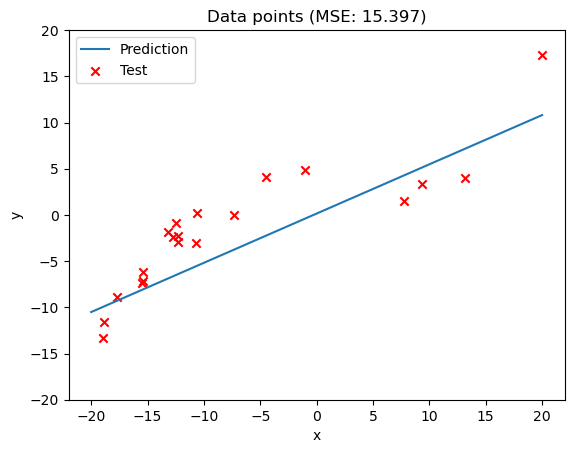

In [7]:
def plot(model):
    # Range of X
    x = np.linspace(-20, 20, 50)

    # Plotting model
    plt.plot(x, model.forward(x), label="Prediction")

    # Plotting test data points
    plt.scatter(
        [i for idx, i in enumerate(X_test)],
        [i for idx, i in enumerate(y_test)],
        label="Test",
        marker="x",
        color="r",
    )

    # Calculate MSE (Mean Square Error) of test data
    y_pred = model.predict(X_test)
    mse = sum([(label - pred) ** 2 for pred, label in zip(y_pred, y_test)]) / len(
        X_test
    )

    plt.title(f"Data points (MSE: {mse:0.3f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim([-20, 20])
    plt.legend()
    plt.show()


plot(linear)

## S2. Polynomial Regression Model

1차 Linear Regression Model은 1차 Polynomial Regression Model과 동일하다고 볼 수 있습니다. 

S2에서는 입력 파라메터에 따라 1차 이상의 차수를 가진 Polynomial Regression Model을 반환하는 `Polynomial` class를 구현합니다.

S1에서 작성된 `Linear` class를 참고하여 구현하시면 됩니다.

`Polynomial` class는 다음 함수들로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 weights와 bias를 초기화합니다.
- `calc`는 계수와 차수, 데이터를 입력받아 각 항을 계산합니다.
- `calc_loss_and_gradient`는 input과 output 사이의 MSE loss와 그 gradient를 계산합니다.
- `shuffle_datasets`는 데이터셋을 섞는 역할을 합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `update_parameters`에서는 계산된 MSE loss와 그 gradient를 입력으로 받아 모델의 가중치를 업데이트 합니다.  
(Tip : update_parameters는 딥러닝 라이브러리에서 backward pass로도 불립니다.)
- `fit`에서는 model을 학습하는 과정으로 `forward`와 `update_parameters`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `predict`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.

학생분들께서는 `Polynomial` class 내의 함수 중 `forward`과 `update_parameters`을 일부 작성하게 됩니다. 

### 2-1) Polynomial Regression Model 구현 <직접구현>
`<your code>` 부분을 작성하여 class를 완성하세요. **(4점, 각 2점)**

단, Feature Normalization은 고려하지 않아도 됩니다.

In [8]:

class Polynomial():
    def __init__(self, dim, batch_size, lr=1e-5):
        self.dim = dim
        # initialization with a numpy array type
        self.weights = np.array([rand() * 0.001 for i in range(self.dim)])
        self.bias = 2.5 # initialization
        self.lr = lr # learning rate
        self.batch_size = batch_size
    
    def calc(self, x, coeff, degree):
        return coeff * x ** degree
        
    def shuffle_datasets(self, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
        
    def fit(self, x, y, epochs):
        x_arr = np.array(x)
        y_arr = np.array(y)
        for e in range(epochs): # epochs 만큼 학습
            # shuffle dataset
            x, y = self.shuffle_datasets(x_arr, y_arr)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size
            remain = len(x) % self.batch_size # batch size 크기의 배수가 아닌 나머지 training example 개수
            x = x[remain:] # remain을 제외한 training example만 사용
            y = y[remain:]
            x = np.array_split(x, num_batches) # 배치 크기씩 데이터 분할
            y = np.array_split(y, num_batches)
            
            # 각 배치마다 파라미터 업데이트
            for batch_x_y in zip(x, y): # 배치 하나씩 학습
                batch_x, batch_y = batch_x_y

                pred = self.forward(batch_x) 
                loss, gradient_weight, gradient_bias = self.calc_loss_and_gradient(
                    pred, batch_y, batch_x
                )

                # parameter update는 backward pass로도 불림
                self.update_parameters(gradient_weight, gradient_bias)

    def predict(self, x):
        # computes the predictions with forward()
        predictions = [self.forward(x_) for x_ in x]
        return predictions # list type

    def forward(self, x):
        # computes the weighted sum of Polynomial regression model
        # Hint : sum([self.calc(...) for i in ...]) + self.bias 
        prediction = sum([self.calc(x, self.weights[i], i+1) for i in range(self.dim)]) + self.bias
        return prediction
    
    def calc_loss_and_gradient(self, pred, y, x):
        # computes the prediction error and its derivative
        loss = np.mean((pred - y) ** 2) # MSE loss
        # Hint : forward 문에서 작성했던 것과 유사한 형태의 list로 작성하세요.
        gradient_weight = [2 * (pred - y) * x ** (i+1) for i in range(self.dim)]
        gradient_bias = np.mean((pred - y) * 2)
        return loss, gradient_weight, gradient_bias

    def update_parameters(self, gradient_weight, gradient_bias):
        self.weights -= np.array(gradient_weight).mean(1).reshape(self.dim) * self.lr
        self.bias -= gradient_bias * self.lr

**Q. 강의 내용과 연관지어 본인이 작성한 코드의 내용을 설명하세요. (미 작성시 과제 점수 감점)**  

prediction = sum([self.calc(x, self.weights[i], i+1) for i in range(self.dim)]) + self.bias
해당 코드는 forward 함수 내에서 작성한 코드입니다. forward 함수가 정의되기 이전에 정의되었던 calc 함수를 사용해 진행하였습니다. calc의 x 부분에는 x를, coeff 부분에는 self.weight[i]를, degree 부분에는 i+1을 대응해주었으며, self.dim에 들어갈 숫자까지의 range를 하나씩 i의 값에 할당해 모두 더하고, 마지막으로 self.bias를 더하는 과정까지 포함하였습니다.

gradient_weight = [2 * (pred - y) * x ** (i+1) for i in range(self.dim)]
해당 코드는 calc_loss_and_gradient 함수 내에서 작성한 코드입니다. self.dim에 들어갈 숫자까지의 range 숫자들을 하나씩 i의 값에 할당해가며 식을 계산할 수 있도록 하였습니다. 이때, 가장 처음에는 해당 코드 앞에 np.mean을 붙이고, i+1이 아닌 i로 설정한 뒤 진행하였었는데 그 결과 계속해서 error가 발생하였습니다. 이를 해결하기 위해 코드를 다시 한 번 살펴본 결과 update_parameters 함수에서 평균 값을 구하고 업데이트를 시킨다는 점을 깨달은 뒤, 지금과 같은 코드로 변경하여 진행하자 올바르게 작동하였습니다.

이전의 이론 강의에서는 '변수 치환'이라는 것에 대해 배웠었습니다. 즉, 하나의 변수에 대해 차수가 다른 다항식 회귀를 각각의 입력 feature로 간주함으로써 Linear Regression 문제로 환원하여 풀 수 있다는 내용이었습니다. 해당 예제에서는 기본적으로 하나의 변수에 대한 다항식 회귀를 표현하긴 하지만, 코드 내에서는 각 차수의 항을 독립적인 특성으로 취급하였고, 이를 바탕으로 학습하였기 때문에 변수 치환의 강의 내용과 어느정도 연관이 있다고 생각합니다.

### 2-2) 다항 회귀 모델 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Polynomial` class와 Trainset을 이용해 2차 다항 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [9]:
# Model define and training

# Define a model
polynomial = Polynomial(
    dim=2, batch_size=1, lr=1e-6
)  #  위에서 구현한 Polynomial regression model 모델 정의

# Training
polynomial.fit(X_train, y_train, 100)  #  100 epoch 학습

# Print weight and bias
for i, weight in enumerate(polynomial.weights):
    print(f"weight_{i+1}: {weight:0.6f}")
print(f"bias: {polynomial.bias:0.6f}")

weight_1: 0.300194
weight_2: -0.008426
bias: 2.509400


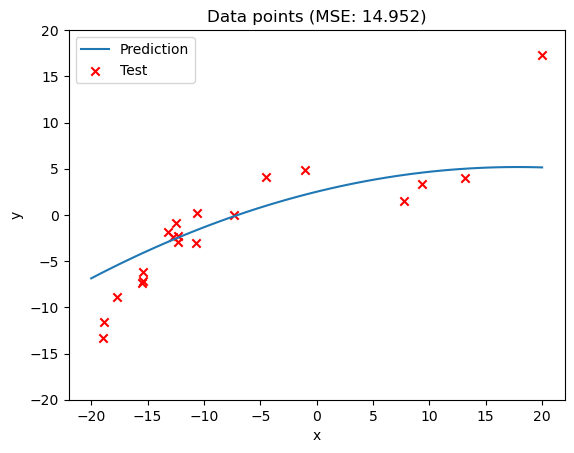

In [10]:
# Plots polynomial and data points
plot(polynomial)

### 2-3) 다항 회귀 모델 분석 

2-2)를 수정하여 1차부터 4차 다항 회귀 모델 중 주어진 데이터셋을 가장 잘 표현하는 차수의 모델 1개를 학습하고 결과를 시각화 하세요. **(4점, 부분점수 없음)**

- 2-2) 코드를 참고하여 작성합니다. (learning rate, dim, batch size, training epoch 등 변경)
- 다양한 시도를 통해 스스로 최적의 차수와 학습 조건을 찾아보세요. 
- 제출 시 MSE 기준 3 이하일 경우 정답으로 채점
- MSE 값이 nan 값인 경우 learning rate 파라메터를 조정하면 해결할 수 있습니다.

In [11]:
# Model define and training
# 위에서 구현한 Polynomial regression model 모델 정의


# Training
# <your code>
polynomial = Polynomial(
    dim=4, batch_size=20, lr=1e-10
)
polynomial.fit(X_train, y_train, 800)

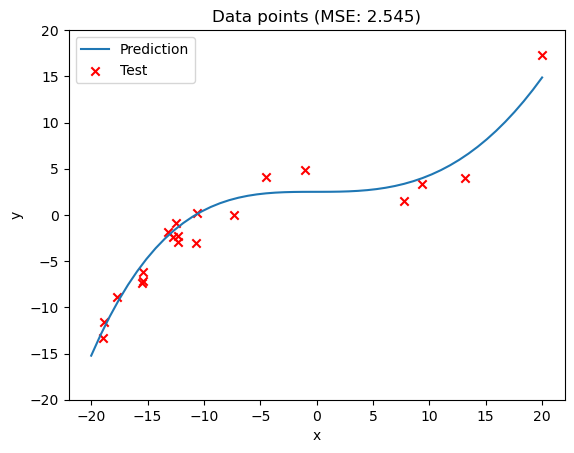

In [12]:
# Plotting polynomial and data points
# <your code>
plot(polynomial)

## S3. Discussion

**1) 본 실습에서 구현한 `Polynomial` class는 Feature Normalization을 사용하지 않았습니다.**

1. 본 실습에서의 상황을 예시로 Feature Normalization을 수행하는 방법을 설명하고,

2. 수업 시간에 배운 내용을 기반으로 Feature Normalization을 수행했을 때의 효과에 대해서 논하세요.

[답변작성]:
1. 우선 해당 실습의 경우 x에 대해 다양한 차수가 존재한다는 특징을 가지고 있습니다. 이때, 그래프를 통해 x의 범위가 -20 ~ 20까지 분포되어 있다는 것을 알 수 있는데, 이를 통해 x의 차수가 증가함에 따라 특성의 범위는 급격하게 커진다는 것을 예상할 수 있습니다. 따라서, 해당 실습의 경우에는 각 특성에서 평균을 제거한 뒤 표준편차로 나누는 feature normalization을 사용할 수 있습니다.

2. 수업시간에 feature normalization을 사용하지 않으면, 스케일의 차이에 따라 gradient를 계산함에 있어 한 feature가 다른 feature에 압도되는 등의 문제점을 토대로 업데이트가 지연되거나 불안정해진다는 것을 배웠던 기억이 있습니다. 이런 상황에서 평균값을 빼고, 표준편차로 나누는 feature normalization을 사용하면, 각 특성들이 그래프 내에서 0에 근접하게 표현될 수 있으며, 가중치의 안정적이고 빠른 업데이트를 통해 학습 속도와 성능을 향상시킬 수 있다는 효과가 있습니다.

---

**2) 배치 크기에 따라 full batch, minibatch, online mode training을 할 수 있습니다. Polynomial class에서 각 mode로 학습해 본 다음, 관찰한 모델의 성능 및 학습 속도 등 차이를 자유롭게 설명하세요.**



[답변작성]:
저의 경우, batch size로 20을 설정한 mini batch training을 사용하였습니다. 
사전에 진행되었던 이론 강의에서, 속도는 느리지만 정확도는 높다는 full batch training의 특징과 정확도는 비교적 낮지만 속도가 빠르다는 online mode traing의 특징, 그리고 두 traing의 적절한 타협접이자 subset을 생성하여 훈련을 진행하는 mini batch training의 특징을 토대로 해당 실습을 통해 이를 직접 확인해보고 싶었습니다.

같은 dim과 같은 lr을 설정한 뒤, batch size를 계속하여 변경하며 학습을 진행해본 결과, online mode traing이 가장 높은 MSE를 가진다는 것을 알 수 있었습니다. 즉, 앞선 강의에서 배웠던 대로 정확도가 가장 낮은 모습이었습니다. 그러나, 의아했던 것은 mini batch와 full batch를 사용했을 때였습니다. full batch는 시간이 오래 걸린다는 단점이 있지만, 그만큼 정확도가 가장 우수하다고 생각했었는데 mini batch를 사용했을 때의 MSE가 full batch의 MSE보다 낮게 나왔기 때문입니다. 이에 대해 앞선 강의 내용을 다시 한 번 상기시켜보고, 고민해본 결과 full batch training 의 경우 과대적합되어 오히려 MSE 값이 증가된 것이라는 결론을 내릴 수 있었습니다.

또한, 각 training의 학습 속도와 관련해서는 traing example의 수가 많지 않아 크게 느껴지지는 않았습니다.

따라서 저는 해당 실습 내에선, 정확도와 관련해 full batch, mini batch, online mode training을 각각 사용해보며 가장 적절했던 dim, batch size, lr을 설정하였습니다.